In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np

from model import CascadeNetwork
from visualization_functions import plot_network

In [2]:
def fraction_failed(model):
    """Return the fraction of the failed nodes for the given `model`"""
    states = [node.failed for node in model.schedule.agents]
    N = model.num_nodes
    return sum(states) / N

In [3]:
adj_matrix = np.matrix([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [1, 1, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 1, 1, 1, 1],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0]])

load_vector = [1, 1, 1, 1, 1, 1, 1, 1, 1]
capacity_vector = [1.7, 1.7, 1.3, 1.3, 1.5, 1.55, 1.55, 1.55, 1.55]

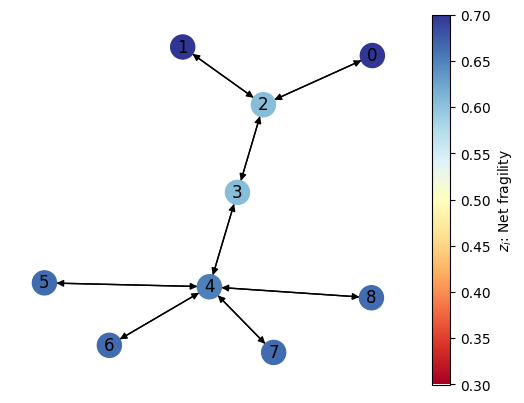

Load shock for node 2


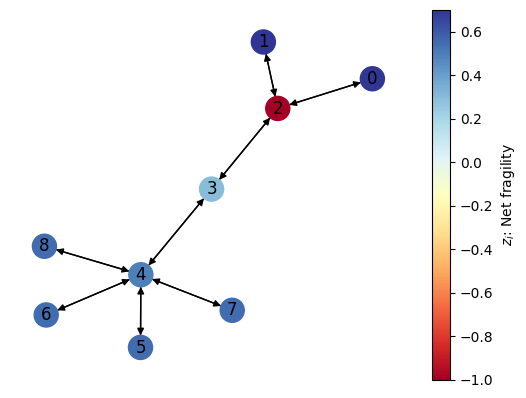

Step 0:
Node 0 (Capacity = 1.7): Load 1.00, non-failed
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.3): Load 5.30, failing
Node 3 (Capacity = 1.3): Load 1.00, non-failed
Node 4 (Capacity = 1.5): Load 1.00, non-failed
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------


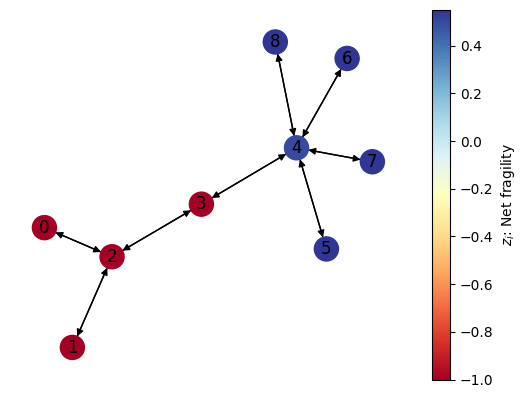

Step 1:
Node 0 (Capacity = 1.7): Load 2.33, failing
Node 1 (Capacity = 1.7): Load 2.33, failing
Node 2 (Capacity = 1.3): Load 1.30, failed
Node 3 (Capacity = 1.3): Load 2.33, failing
Node 4 (Capacity = 1.5): Load 1.00, non-failed
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------


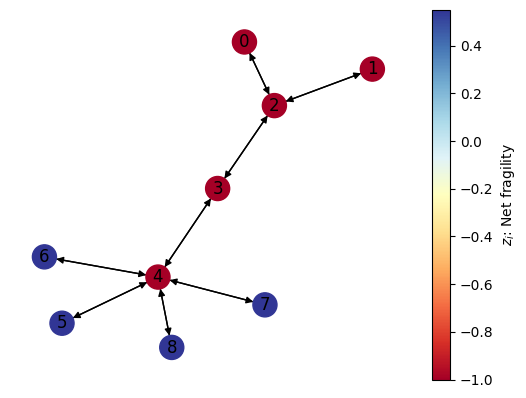

Step 2:
Node 0 (Capacity = 1.7): Load 1.70, failed
Node 1 (Capacity = 1.7): Load 1.70, failed
Node 2 (Capacity = 1.3): Load 1.30, failed
Node 3 (Capacity = 1.3): Load 1.30, failed
Node 4 (Capacity = 1.5): Load 2.03, failing
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------


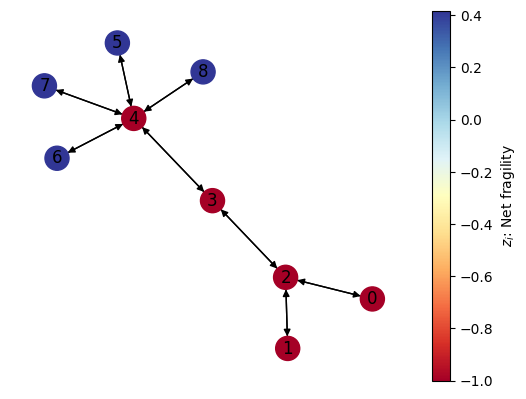

Step 3:
Node 0 (Capacity = 1.7): Load 1.70, failed
Node 1 (Capacity = 1.7): Load 1.70, failed
Node 2 (Capacity = 1.3): Load 1.30, failed
Node 3 (Capacity = 1.3): Load 1.30, failed
Node 4 (Capacity = 1.5): Load 1.50, failed
Node 5 (Capacity = 1.55): Load 1.13, non-failed
Node 6 (Capacity = 1.55): Load 1.13, non-failed
Node 7 (Capacity = 1.55): Load 1.13, non-failed
Node 8 (Capacity = 1.55): Load 1.13, non-failed
------------------------------------------------------------


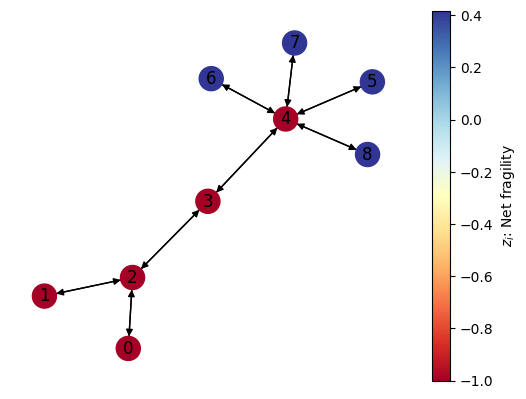

X =  0.5555555555555556


In [5]:
overload_model = CascadeNetwork(adj_matrix, load_vector, capacity_vector, model_type="overload", load_type="llss", test=True)
plot_network(overload_model)
(print("Load shock for node 2"))
overload_model.set_load(2, 5.3)
plot_network(overload_model)

num_steps = 4

for _ in range(num_steps):
    overload_model.step()
    plot_network(overload_model)

print("X = ", fraction_failed(overload_model))

In [6]:
# Default values
max_steps = 10
global_frac = 0
load = 4
step_size = 0.01
init_load=max(capacity_vector)+0.1
init_node = 2

def find_critical_load(adj_matrix=adj_matrix,capacity_vector=capacity_vector,init_load=init_load,init_node=init_node, step_size=step_size, max_steps=max_steps):
    load = init_load
    load_vector = [1,1,1,1,1,1,1,1,1]
    load_vector[init_node] = load
    global_frac = 0
    # Plot to check correct initialization
    # plot_network(CascadeNetwork(adj_matrix, load_vector, capacity_vector, model_type="overload", load_type="llsc", test=False))
    while global_frac != 1:
        critical_load_network = CascadeNetwork(adj_matrix, load_vector, capacity_vector, model_type="overload", load_type="llss", test=False)
        for _ in range(max_steps):
            critical_load_network.step()
        global_frac = fraction_failed(critical_load_network)
        load+=step_size
        load_vector[init_node] = load
    return load-step_size, critical_load_network

In [7]:
critical_load, failed_network = find_critical_load(step_size=0.01)
print("Critical load:",critical_load)

Critical load: 10.309999999999823


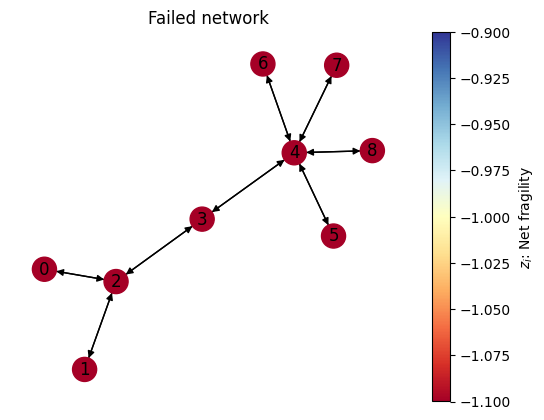

In [8]:
plot_network(failed_network, title="Failed network")

In [30]:
critical_loads_all_init_nodes = []
num_nodes = adj_matrix.shape[0]
for node_id in range(num_nodes):
    critical_load, _ = find_critical_load(init_node=node_id,step_size=0.01)
    critical_loads_all_init_nodes.append(critical_load)


In [38]:
print(capacity_vector)
degrees = (np.sum(adj_matrix, axis=1))
degrees_list = degrees.tolist()
print(degrees_list)
print([round(load,4) for load in critical_loads_all_init_nodes])

[1.7, 1.7, 1.3, 1.3, 1.5, 1.55, 1.55, 1.55, 1.55]
[[1], [1], [3], [2], [5], [1], [1], [1], [1]]
[8.01, 8.01, 10.31, 6.71, 11.51, 10.06, 10.06, 10.06, 10.06]


# Result

The critical loads are in this model with local load shedding different than the one with local load sharing and conservation! And it seems to correlate with the capacity of initial node and it's position in the network. Nodes 0 and 1 had a lower critical load than node 2, which has smaller capacity but has a higher degree. Node 3 on the other hand has the same degree as node 0 and 1 but lower capacity. It's critical load is also lower. Node 4 has the highest degree 5 and the highest critical load 11.5.

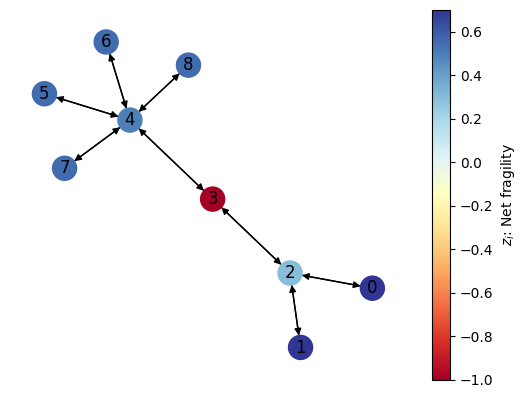

Step 0:
Node 0 (Capacity = 1.7): Load 1.00, non-failed
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.3): Load 1.00, non-failed
Node 3 (Capacity = 1.3): Load 6.72, failing
Node 4 (Capacity = 1.5): Load 1.00, non-failed
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------


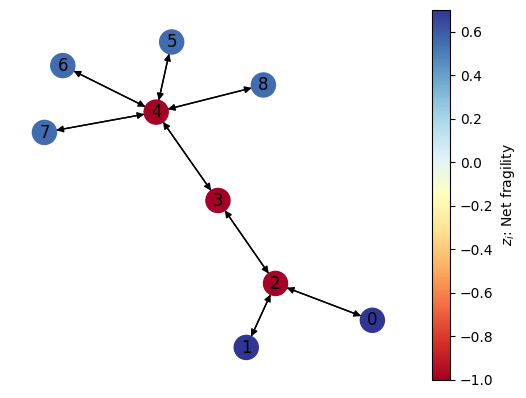

Step 1:
Node 0 (Capacity = 1.7): Load 1.00, non-failed
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.3): Load 3.71, failing
Node 3 (Capacity = 1.3): Load 1.30, failed
Node 4 (Capacity = 1.5): Load 3.71, failing
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------


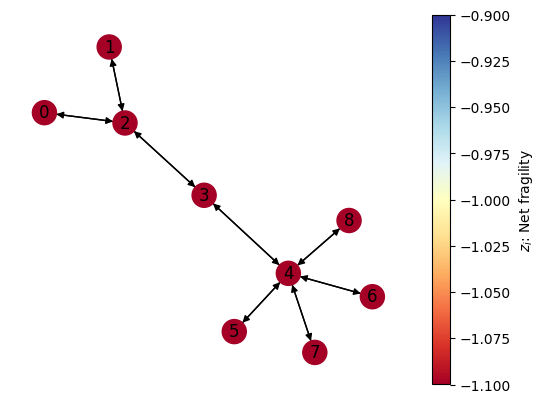

Step 2:
Node 0 (Capacity = 1.7): Load 2.21, failing
Node 1 (Capacity = 1.7): Load 2.21, failing
Node 2 (Capacity = 1.3): Load 1.30, failed
Node 3 (Capacity = 1.3): Load 1.30, failed
Node 4 (Capacity = 1.5): Load 1.50, failed
Node 5 (Capacity = 1.55): Load 1.55, failing
Node 6 (Capacity = 1.55): Load 1.55, failing
Node 7 (Capacity = 1.55): Load 1.55, failing
Node 8 (Capacity = 1.55): Load 1.55, failing
------------------------------------------------------------


In [40]:
critical_load_vec = load_vector.copy()
critical_load_vec[3] = 6.72
test_node_3 = CascadeNetwork(adj_matrix, critical_load_vec, capacity_vector, model_type="overload", load_type="llss", test=True)

for _ in range(3):
    plot_network(test_node_3)
    test_node_3.step()

## Homogeneous capacities

In [25]:
capacity_vector_homo = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
capacity_vector_random = [np.random.normal(4,1) for _ in range(9)]

In [41]:
critical_loads_all_init_nodes_homo = []
num_nodes = adj_matrix.shape[0]
for node_id in range(num_nodes):
    critical_load, _ = find_critical_load(init_node=node_id,step_size=0.01, capacity_vector=capacity_vector_homo)
    critical_loads_all_init_nodes_homo.append(critical_load)

print(capacity_vector_homo)
print(degrees_list)
print([round(load,4) for load in critical_loads_all_init_nodes_homo])

[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
[[1], [1], [3], [2], [5], [1], [1], [1], [1]]
[8.01, 8.01, 10.51, 6.51, 11.51, 10.01, 10.01, 10.01, 10.01]


Here we can analyze how the initial node load shock affects the total collapse of the system. Node 3 has the lowest critical load. Node 3's characteristics is a low degree but at the core of the network.

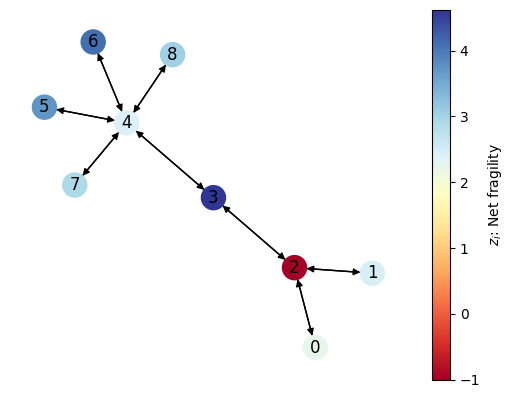

Step 0:
Node 0 (Capacity = 3.2331859197975694): Load 1.00, non-failed
Node 1 (Capacity = 3.455650948612495): Load 1.00, non-failed
Node 2 (Capacity = 4.7153959552271445): Load 20.00, failing
Node 3 (Capacity = 5.619470772036509): Load 1.00, non-failed
Node 4 (Capacity = 3.424026929542594): Load 1.00, non-failed
Node 5 (Capacity = 4.7327871141165785): Load 1.00, non-failed
Node 6 (Capacity = 5.112782317053425): Load 1.00, non-failed
Node 7 (Capacity = 3.916835750344782): Load 1.00, non-failed
Node 8 (Capacity = 4.060313658056132): Load 1.00, non-failed
------------------------------------------------------------


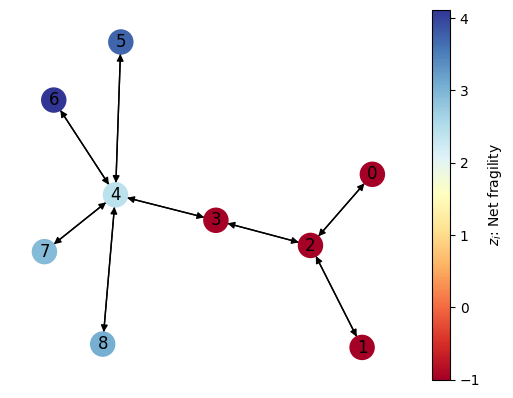

Step 1:
Node 0 (Capacity = 3.2331859197975694): Load 6.09, failing
Node 1 (Capacity = 3.455650948612495): Load 6.09, failing
Node 2 (Capacity = 4.7153959552271445): Load 4.72, failed
Node 3 (Capacity = 5.619470772036509): Load 6.09, failing
Node 4 (Capacity = 3.424026929542594): Load 1.00, non-failed
Node 5 (Capacity = 4.7327871141165785): Load 1.00, non-failed
Node 6 (Capacity = 5.112782317053425): Load 1.00, non-failed
Node 7 (Capacity = 3.916835750344782): Load 1.00, non-failed
Node 8 (Capacity = 4.060313658056132): Load 1.00, non-failed
------------------------------------------------------------


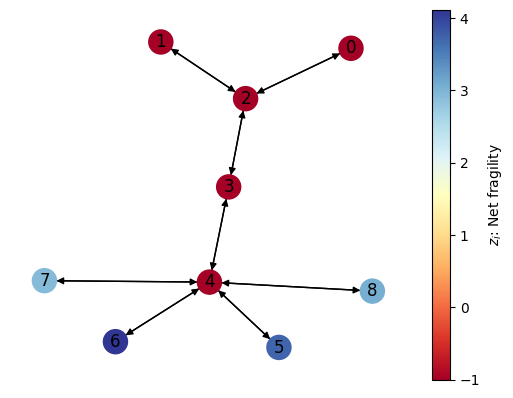

Step 2:
Node 0 (Capacity = 3.2331859197975694): Load 3.23, failed
Node 1 (Capacity = 3.455650948612495): Load 3.46, failed
Node 2 (Capacity = 4.7153959552271445): Load 4.72, failed
Node 3 (Capacity = 5.619470772036509): Load 5.62, failed
Node 4 (Capacity = 3.424026929542594): Load 11.63, failing
Node 5 (Capacity = 4.7327871141165785): Load 1.00, non-failed
Node 6 (Capacity = 5.112782317053425): Load 1.00, non-failed
Node 7 (Capacity = 3.916835750344782): Load 1.00, non-failed
Node 8 (Capacity = 4.060313658056132): Load 1.00, non-failed
------------------------------------------------------------


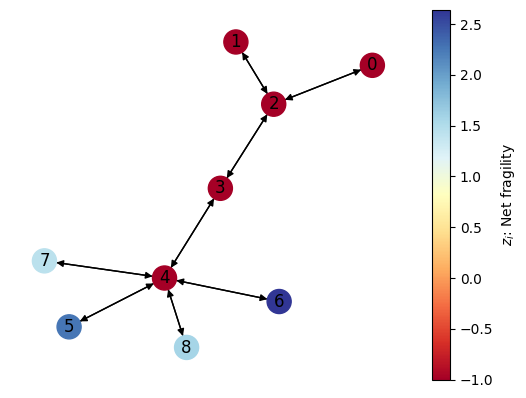

Step 3:
Node 0 (Capacity = 3.2331859197975694): Load 3.23, failed
Node 1 (Capacity = 3.455650948612495): Load 3.46, failed
Node 2 (Capacity = 4.7153959552271445): Load 4.72, failed
Node 3 (Capacity = 5.619470772036509): Load 5.62, failed
Node 4 (Capacity = 3.424026929542594): Load 3.42, failed
Node 5 (Capacity = 4.7327871141165785): Load 2.47, non-failed
Node 6 (Capacity = 5.112782317053425): Load 2.47, non-failed
Node 7 (Capacity = 3.916835750344782): Load 2.47, non-failed
Node 8 (Capacity = 4.060313658056132): Load 2.47, non-failed
------------------------------------------------------------


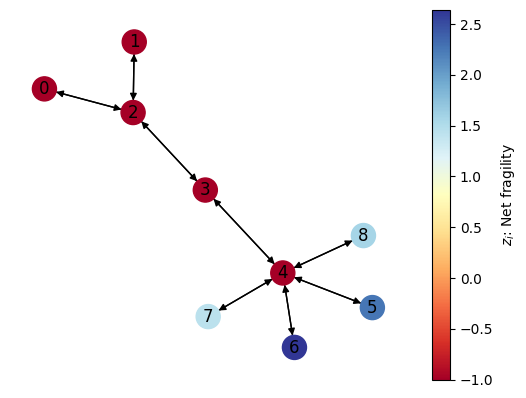

Step 4:
Node 0 (Capacity = 3.2331859197975694): Load 3.23, failed
Node 1 (Capacity = 3.455650948612495): Load 3.46, failed
Node 2 (Capacity = 4.7153959552271445): Load 4.72, failed
Node 3 (Capacity = 5.619470772036509): Load 5.62, failed
Node 4 (Capacity = 3.424026929542594): Load 3.42, failed
Node 5 (Capacity = 4.7327871141165785): Load 2.47, non-failed
Node 6 (Capacity = 5.112782317053425): Load 2.47, non-failed
Node 7 (Capacity = 3.916835750344782): Load 2.47, non-failed
Node 8 (Capacity = 4.060313658056132): Load 2.47, non-failed
------------------------------------------------------------


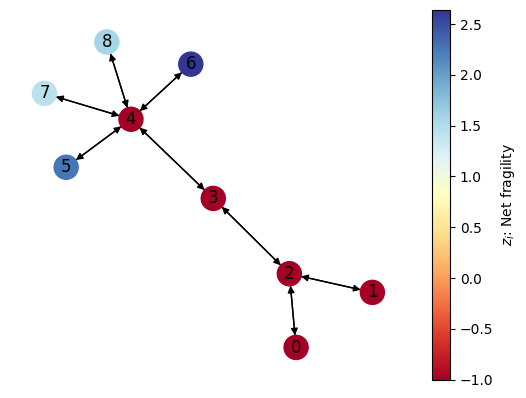

In [27]:
test_network = CascadeNetwork(adj_matrix, load_vector, capacity_vector_random, model_type="overload", load_type="llsc", test=True)
test_network.set_load(2,20)
plot_network(test_network)
for _ in range(5):
    test_network.step()
    plot_network(test_network)